# Q1. Explain GET and POST methods.

### ans

### GET Method:

* Purpose: The GET method is used to request data from a specified resource.

* Data in URL: When we make a GET request, the data is appended to the URL in the form of parameters. This makes it visible in the URL bar of the browser.

* Caching: GET requests can be cached by the browser, and they can be bookmarked and shared.

* Idempotent: In the context of HTTP, a method is considered idempotent if the result of performing it once is the same as performing it multiple times. GET is generally considered idempotent because it does not change the state of the server.

In [ ]:
#Example:

GET /search?query=openai&page=1

### POST Method:

* Purpose: The POST method is used to submit data to be processed to a specified resource. It's commonly used when submitting forms on a web page or when sending data that is sensitive or too large to be included in a GET request.

* Data in Request Body: With POST, the data is sent in the request body, which is not visible in the URL bar of the browser.

* No Caching: POST requests are not cached by the browser, and they cannot be bookmarked or shared.

* Not Idempotent: Unlike GET, POST requests are not idempotent. This means that sending the same POST request multiple times may result in different outcomes.

In [ ]:
#Example:

POST /submit

Body:
{
    "operation":"divide",
    "num1":10,
    "num2":2
}

The choice between using GET and POST depends on the type of data we are sending and the purpose of the request:

* Use GET when:
  * we are retrieving data from the server.
  * The request is safe and idempotent (i.e., it doesn't modify the server's state).
  * we want to bookmark or share the URL.

* Use POST when:
  * we are submitting data to the server (e.g., form submissions).
  * The request may change the server's state.
  * we are sending sensitive or large amounts of data.

# Q2. Why is request used in Flask?

### ans

In Flask, the request object is used to handle incoming HTTP requests. It provides a way to access and interact with data sent by clients (e.g., web browsers) when they make requests to our Flask application. 


Here are several reasons why the request object is crucial in Flask:

1. Accessing Form Data:

When a user submits a form on a webpage, the form data is sent to the server as part of an HTTP request. The request object allows us to access this data, making it easy to process and handle user input.

In [ ]:
#Examples:
from flask import Flask, request

app = Flask(__name__)

@app.route('/submit_form', methods=['POST'])
def submit_form():
    name = request.form['name']
    email = request.form['email']
    # Process the form data...


2. Handling Query Parameters:

Query parameters are used in URLs to pass information to the server. The request object allows us to retrieve these parameters, making it possible to customize the behavior of our application based on user input.

In [ ]:
#Examples:
from flask import Flask, request

app = Flask(__name__)

@app.route('/search', methods=['GET'])
def search():
    query = request.args.get('query')
    page = request.args.get('page')
    # Process the query parameters...


3. File Uploads:

If a user uploads a file through a form on our website, the file data is sent as part of an HTTP request. The request object provides a way to access and process these files.


In [ ]:
#Example:
from flask import Flask, request

app = Flask(__name__)

@app.route('/upload_file', methods=['POST'])
def upload_file():
    uploaded_file = request.files['file']
    # Process the uploaded file...


4. Accessing Headers and Cookies:

The request object allows us to access the HTTP headers sent by the client. This can be useful for tasks such as retrieving user agent information or handling authentication tokens.

In [ ]:
#Examples:
from flask import Flask, request

app = Flask(__name__)

@app.route('/get_user_agent', methods=['GET'])
def get_user_agent():
    user_agent = request.headers.get('User-Agent')
    return f'User-Agent: {user_agent}'


5. Handling Different HTTP Methods:

The request object lets us to determine the HTTP method used in the request (e.g., GET, POST, PUT, DELETE). This information is crucial for routing and processing requests appropriately.

In [ ]:
#Examples:
from flask import Flask, request

app = Flask(__name__)

@app.route('/process_data', methods=['POST', 'PUT'])
def process_data():
    if request.method == 'POST':
        # Handle POST request
    elif request.method == 'PUT':
        # Handle PUT request


# Q3. Why is redirect() used in Flask?

### ans

redirect() is a function provided by the Flask framework that allows us to redirect the client's browser to a different URL. It's used for various purposes in web applications.

Some common reasons why redirect() is used in Flask are:

1. Changing Routes:

After processing a request, we might want to direct the user to a different route or page within our application. This is often the case after a form submission or when handling authentication.

In [ ]:
#Example:
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/login', methods=['POST'])
def login():
    # Process login form
    # Redirect to the user's profile page on successful login
    return redirect(url_for('user_profile', username='john_doe'))


2. Handling Form Submissions:

After a user submits a form, it's common to redirect them to a different page to display the results or a success message. This helps prevent the user from accidentally resubmitting the form by refreshing the page.

In [ ]:
#Example:
from flask import Flask, render_template, request, redirect, url_for

app = Flask(__name__)

@app.route('/submit_form', methods=['POST'])
def submit_form():
    # Process form data
    # Redirect to a success page
    return redirect(url_for('success'))


3. Redirecting After an Action:

After performing an action, such as creating a new resource or updating an existing one, it's common to redirect the user to a page where they can view or interact with the updated data.

In [ ]:
#Example:
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/create_post', methods=['POST'])
def create_post():
    # Process form data and create a new post
    # Redirect to the newly created post
    return redirect(url_for('view_post', post_id=new_post_id))


4. Handling Authentication and Authorization:

After a user logs in or logs out, it's common to redirect them to a specific page, such as their profile or the home page.

In [ ]:
#Example:
from flask import Flask, redirect, url_for, session

app = Flask(__name__)

@app.route('/logout')
def logout():
    # Clear session data or perform logout actions
    session.clear()
    # Redirect to the home page
    return redirect(url_for('home'))


5. Handling Errors and Invalid Inputs:

When there are errors in form submissions or if the user provides invalid input, we may want to redirect them back to the form with error messages.

In [ ]:
#Example:
from flask import Flask, render_template, request, redirect, url_for

app = Flask(__name__)

@app.route('/submit_form', methods=['POST'])
def submit_form():
    if not request.form.get('name'):
        flash('Please enter your name.', 'error')
        return redirect(url_for('show_form'))
    # Process form data
    return redirect(url_for('success'))


# Q4. What are templates in Flask? Why is the render_template() function used?

### ans

In Flask, templates refer to the HTML files that are used to render dynamic web pages. These templates allow us to dynamically generate HTML content by inserting dynamic data (e.g., variables, loops, conditional statements) into the HTML structure. This separation of logic (Python code in Flask) and presentation (HTML templates) is a fundamental concept in web development and follows the Model-View-Controller (MVC) design pattern.

### Templates are important in Flask because of: 

1. Separation of Concerns:

Templates allow us to separate the presentation layer (HTML structure) from the business logic (Python code). This makes our codebase more organized, maintainable, and easier to work with, especially in larger applications.

2. Dynamic Content:

Templates enable us to generate dynamic content based on the data we have in our application. 
 * For example
   * we can display a list of products, user details, or any other dynamic information.

3. Reusability:

Templates can be reused across multiple routes or views. This means we can use the same template to render different pages or sections of our website with different data.

4. Ease of Design Updates:

Web designers can work on the HTML templates separately from the Flask application logic. This allows for easier collaboration and design updates without affecting the underlying code.

### The render_template() function used in flask because:

* The " render_template() " function is used to render HTML templates in Flask. It takes the name of the template file as an argument and, optionally, any data that we want to pass to the template. The function then combines the template with the provided data to generate the final HTML page, which is sent as the response to the client's browser.

  * Example of using render_template():

In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    # Data to be passed to the template
    user = {'username': 'john_doe', 'email': 'john@example.com'}
    
    # Render the 'home.html' template with the provided data
    return render_template('home.html', user=user)


* Explanation:
  * The render_template() function is used to render the 'home.html' template, and the user dictionary is passed as data to be used in the template. Inside 'home.html', we can access the user variable to display user-specific information.

# Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

### ans

* Here i use Python and the Flask framework to create a simple API.
* Code for that is given below:

In [ ]:
from flask import Flask, request, render_template, jsonify

app = Flask(__name__)

@app.route("/")
def home_page():
    return render_template('index.html')

@app.route('/postman_action', methods=['POST'])
def math_ops1():
    if(request.method == 'POST'):
        ops = request.json['operation']
        num1 = int(request.json['num1'])
        num2 = int(request.json['num2'])
        if ops == 'add':
            r = num1+num2
            result = "The sum of " + str(num1) + 'and' + str(num2) + 'is' + str(r)
        if ops == 'subtract':
            r = num1-num2
            result = "The subtract of " + str(num1) + 'and' + str(num2) + 'is' + str(r)
        if ops == 'multiply':
            r = num1*num2
            result = "The multiply of " + str(num1) + 'and' + str(num2) + 'is' + str(r)
        if ops == 'divide':
            r = num1/num2
            result = "The divide of " + str(num1) + 'and' + str(num2) + 'is' + str(r)

        return jsonify(result)

if __name__=="__main__":
    app.run(host="0.0.0.0")

### Now Test with Postman:
1. Open Postman.

2. Create a new request with the method set to POST.

3. Enter the URL of your API (e.g., https://red-artist-uscxe.pwskills.app:5000/postman_action).

4. Click "Send".

### we would like to attach a screenshot in a Jupyter Notebook, then follow these steps:
1. Take a screenshot of the Postman output.

2. Save the screenshot to our local machine.
 
3. In our Jupyter Notebook, create a new Markdown cell.

4. Use the following syntax to embed the image:

In [ ]:
![Screenshot](path_to_your_screenshot.png) 

# Replace path_to_our_screenshot.png with the actual path to our saved screenshot.

### The screen short for addition of two numbers is:

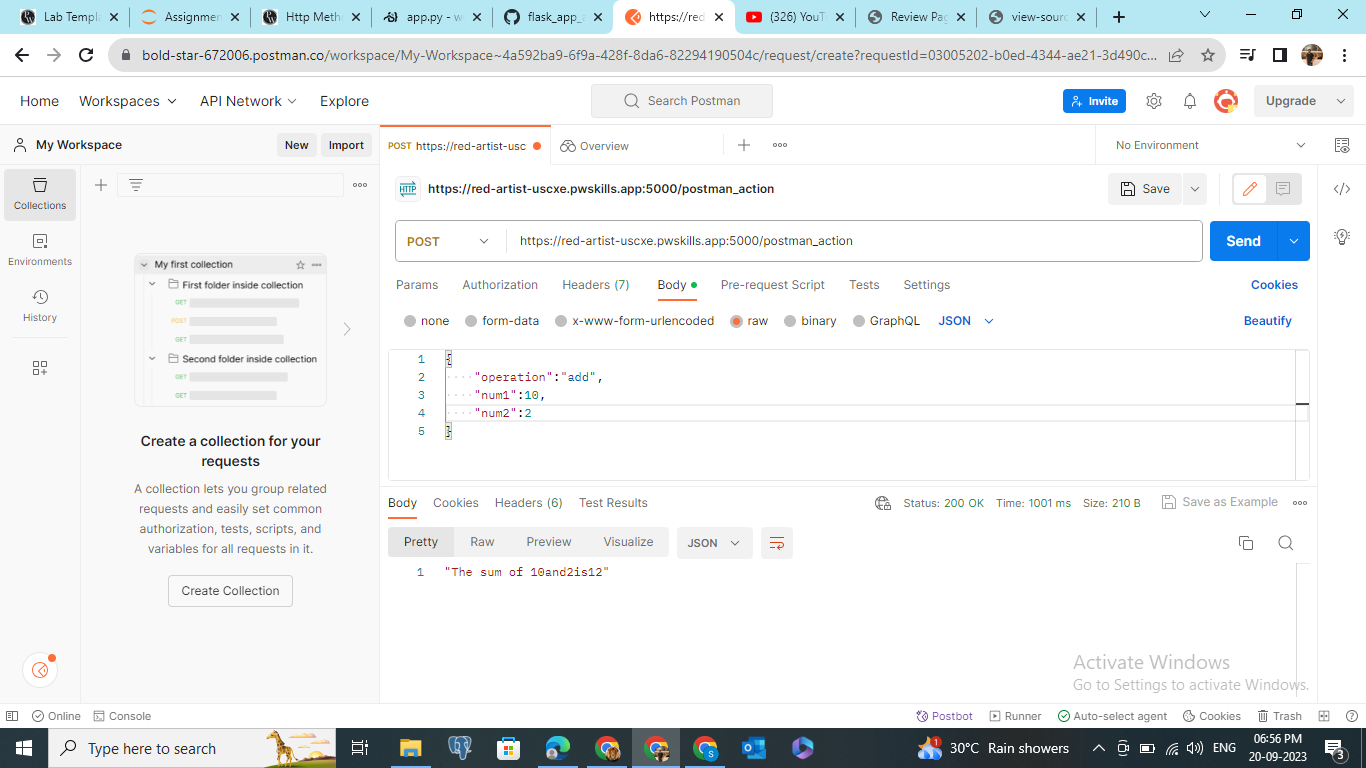

### The screen short for substraction of two numbers is:

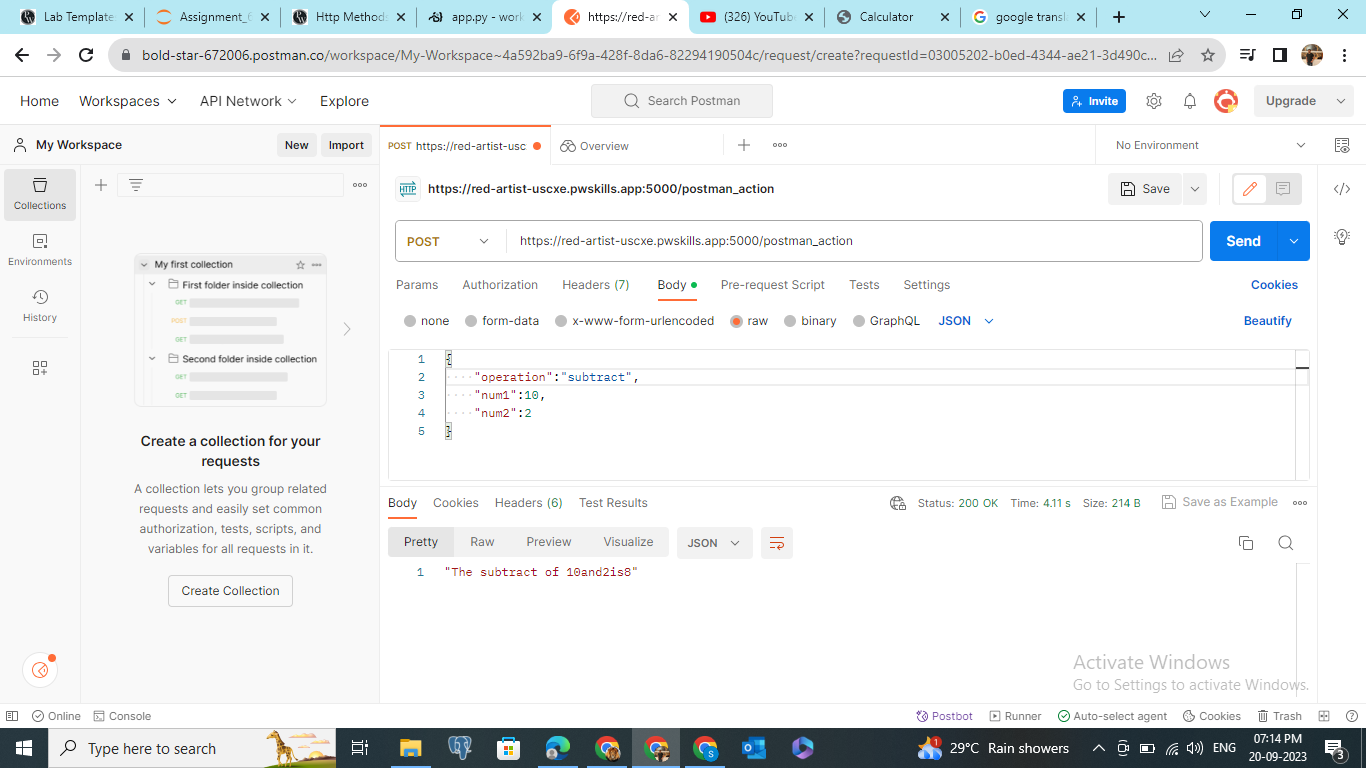

### The screen short for multiplication of two numbers is:

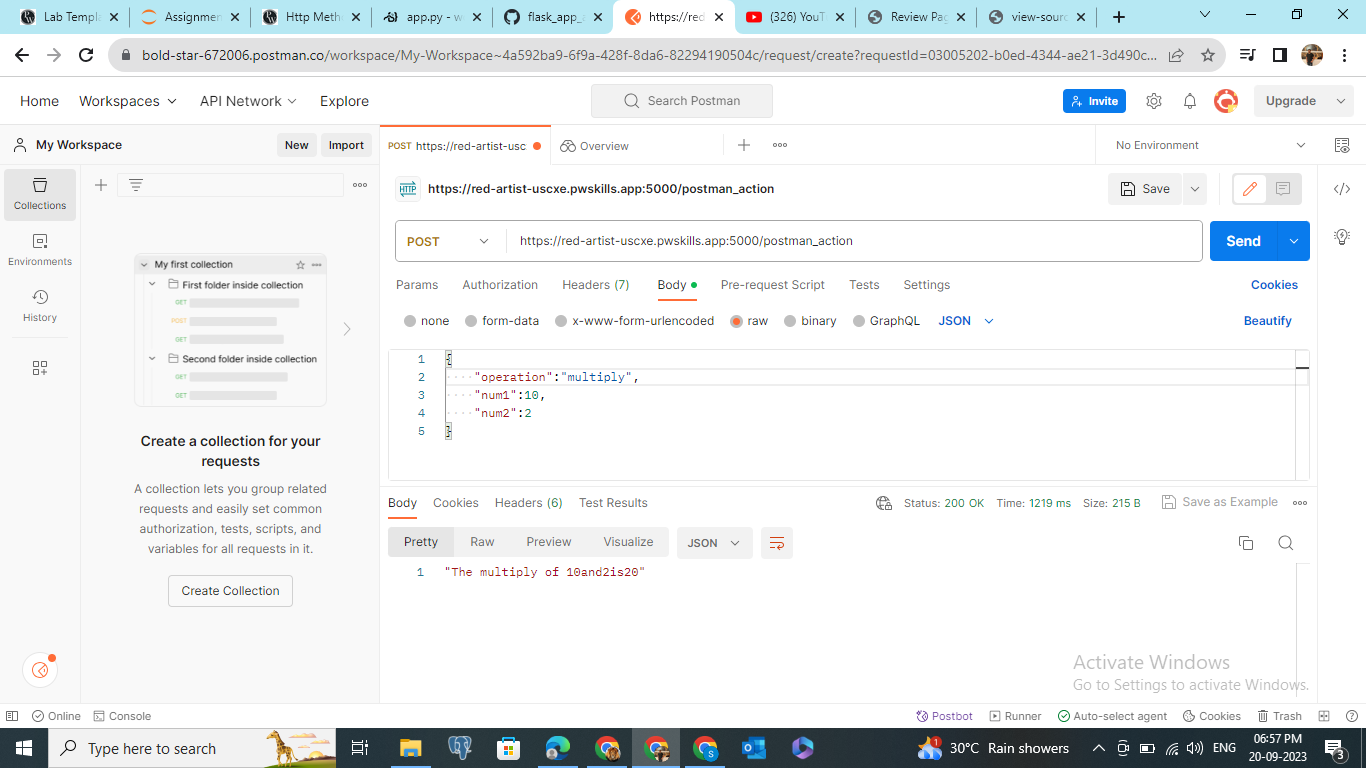